In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import os
from datetime import datetime

In [85]:
# read all files into pandas dataframes, stored in a dictionary.
# dictionary keys are the file names, values are dataframes

dataset={}

for i in os.listdir():
    if "csv" in i:
        dataset["{0}".format(i)] = pd.read_csv(i)
        
# grab list of file names for easy access
        
filenames = list(dataset.keys())

In [86]:
# look at dataframes - change file ## to shuffle through files
# air reserve data

file = 0

data = dataset[filenames[file]]
data.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [99]:
# function to convert datetime values into friendlier format using datetime package

def date_converter(df, dates_key, datemask="%Y-%m-%d %H:%M:%S"):

    date = []

    for i in range(len(df)):
        d = datetime.strptime(df[dates_key][i], datemask)
        date.append(d)

    df[dates_key + "_conv"] = date
    
    return df

In [92]:
# convert dates using above function

data = date_converter(data, "visit_datetime")
data = date_converter(data, "reserve_datetime")

# calculate difference in reservation time vs. actual visit time

data["delta_datetime"] = data["visit_datetime_conv"] - data["reserve_datetime_conv"]

data.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_datetime_conv,reserve_datetime_conv,delta_datetime
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01 19:00:00,2016-01-01 16:00:00,03:00:00
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01 19:00:00,2016-01-01 19:00:00,00:00:00
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01 19:00:00,2016-01-01 19:00:00,00:00:00
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01 20:00:00,2016-01-01 16:00:00,04:00:00
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01 20:00:00,2016-01-01 01:00:00,19:00:00


In [93]:
# number of unique store IDs vs. total entries

print(len(data.air_store_id.unique()))
len(data)

314


92378

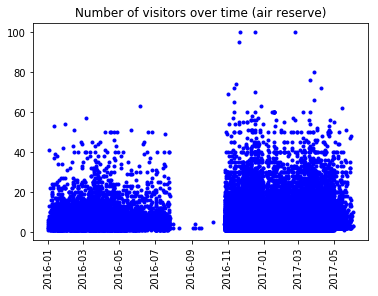

In [94]:
# visualize number of visitors over time

plt.plot(data.visit_datetime_conv, data.reserve_visitors, ".", color="blue")
plt.xticks(rotation=90)
plt.title("Number of visitors over time (air reserve)")
None

In [100]:
# air visit data

file = 2

data = dataset[filenames[file]]
data = date_converter(data, "visit_date", "%Y-%m-%d")

data.head()

,air_store_id,visit_date,visitors,visit_date_conv
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18


In [102]:
# number of unique store IDs vs. total entries

print(len(data.air_store_id.unique()))
len(data)

829


252108

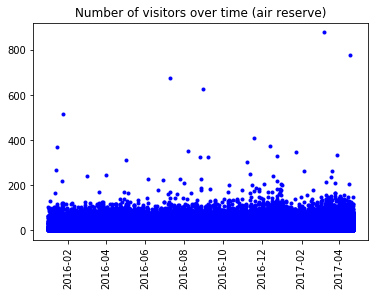

In [104]:
# visualize number of visitors over time

plt.plot(data.visit_date_conv, data.visitors, ".", color="blue")
plt.xticks(rotation=90)
plt.title("Number of visitors over time (air reserve)")
None